In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
df = pd.read_csv('/home/rafael/TCC_I/files_python/comments.tsv', sep='\t', header=None)

In [3]:
df

,0,1,2,3
0,2019-10-29T16:04:52+0000,2611138895633384_2611142508966356,Ele se mostrou muito melhor do que imaginávamo...,287.0
1,2019-10-29T16:10:44+0000,2611138895633384_2611155828965024,Já dizia minha saudosa mãe-vó (que Deus a tenh...,17.0
2,2019-10-29T16:07:08+0000,2611138895633384_2611148398965767,Um ser sem luz.,NaN
3,Que puxou toda a escuridão das pessoas com men...,NaN,NaN,NaN
4,Tempos muito sombrios.,19,NaN,NaN
...,...,...,...,...
3877,"Deveria ir.para SUS , quem sabe daria valor pa...",NaN,NaN,NaN
3878,"Corja de abutres , sangue sugas...",0,NaN,NaN
3879,2019-10-28T14:53:05+0000,2608922922521648_2608951465852127,Ótimo ver as políticos agindo de forma civiliz...,0.0
3880,2019-10-28T23:47:07+0000,2608922922521648_2609749379105669,Morte só política,0.0


In [4]:
text = ''
i = 0
while (i <= 3881):
    text = text + str(df[2][i])
    i += 1

In [5]:
print ("There are {} words in the combination of all review.".format(len(text)))

There are 199247 words in the combination of all review.


In [6]:
print(text)

Ele se mostrou muito melhor do que imaginávamos. Pegou a casa em desordem, todo mundo perdido, situação complicada. Aos poucos foi organizando tudo e hoje a nação esta muito feliz com seu trabalho. Parabéns, Jorge Jesus. Grande técnico, tem meu reconhecimento!Já dizia minha saudosa mãe-vó (que Deus a tenha) que: " tapa dado e palavra dita, nada justifica", porque pedido de desculpas, perdão, etc, não muda o fato.Um ser sem luz.nannanHaddad, se eu fosse você ficava quieto, pela incopetencia administrativa, o seu silencio ficaria melhor. Na boa.Deveria pedir desculpas por existir...já tá de bom tamanho.COMO arrumar uma casa que sofreu um terremoto financeiro, onde todos pilares foram abalado e corrompidos. PENSE NISSO.Senhor Haddad, por que não fala isso para seu chefe, quem deixou o Brasil na lona foi vocês do PT !nannannanAgora eu gostei professor... Belas palavras!Ele poderia pedir desculpas e renunciar, será que é pedir muito ? 🙏🙏🙏Fernando Haddad inteligência ,competência e sábio.nan

In [7]:
stopwords = set(STOPWORDS)

In [8]:
stopwords.update(['de', 'que', 'um', 'por', 'ter', 'não', 'seu', 'sua', 'como', 'isso', 'para', 'os', 'as', 'se'])

In [9]:
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)

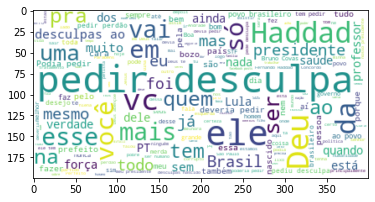

In [10]:
plt.imshow(wordcloud, interpolation='bilinear')

(0.0, 1.0, 0.0, 1.0)

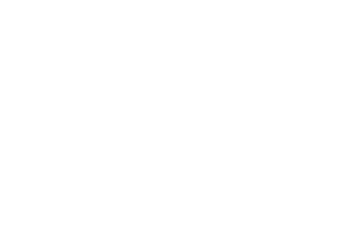

In [40]:
plt.axis('off')

In [42]:
plt.show()

In [44]:
wordcloud.to_file("/home/rafael/TCC_I/files_python/first_review.png")

In [65]:
wine_mask = np.array(Image.open("/home/rafael/TCC_I/files_python/wine_mask.png"))

In [66]:
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [69]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [70]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

In [71]:
for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [72]:
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [77]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=3, contour_color='black')

In [78]:
wc.generate(text)

In [79]:
wc.to_file("/home/rafael/TCC_I/files_python/wine.png")

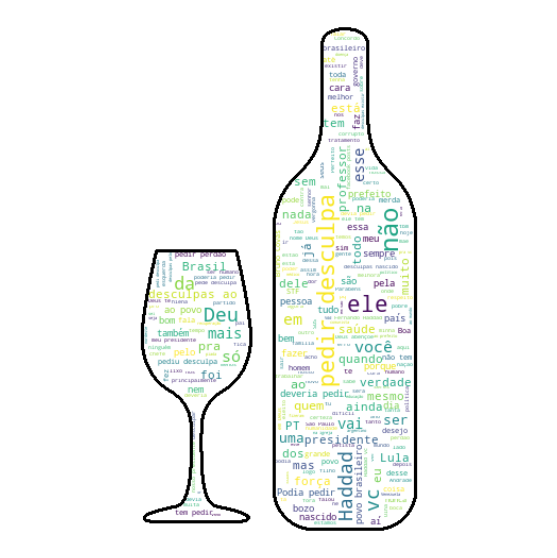

In [83]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()